# Naive bayes method

In [12]:
import matplotlib.pyplot as plt
import seaborn
import plotly
#import plotly.plotly as py
import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='XXXXXX', api_key='XXXXXXX')
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [13]:
# read csv file and save it in a data frame
data_df=pd.read_csv("HittenTweetsWithPredictions.csv")

In [14]:
# remove data with NAN predictions
data_df=data_df[~data_df['predictions'].isna()]

In [15]:
# remove the "Neutral" class
data_df=data_df[data_df['predictions'] != "neutral"]

In [16]:
# change values to numeric
data_df['predictions'] = data_df['predictions'].map({'positive': 1, 'negative': 0}) 
data_df.head(5)

,Unnamed: 0,replies,retweets,favorites,text,day,time,tokens,normalized,tokenized,predictions,username
0,0,0,0,0,وماذا عن إزعاج ما يزيد على ستة أشهر لأحياء سكن...,02/08/2020,09:16,"['وماذا', 'إزعاج', 'يزيد', 'ستة', 'أشهر', 'لأح...",وماذا ازعاج يزيد سته اشهر لاحياء سكنيه والاف ...,"['وماذا', 'ازعاج', 'يزيد', 'سته', 'اشهر', 'لاح...",0,SsE1j8MeFSuOZY9
1,1,0,0,0,عدلك يا رب,02/04/2020,22:03,"['عدلك', 'رب']",عدلك رب,"['عدلك', 'رب']",1,Bndr888_
2,2,1,0,0,إلا قرقعة ودوشة قارفينا ببيتي قال فن قال,24/01/2020,20:02,"['قرقعة', 'ودوشة', 'قارفينا', 'ببيتي', 'قال', ...",قرقعه ودوشه قارفينا بيتي قال فن قال,"['قرقعه', 'ودوشه', 'قارفينا', 'بيتي', 'قال', '...",0,Bndr888_
3,3,1,0,0,٦ شهور محبورة اعيش ببيتي والبوليفارد يردح على ...,21/01/2020,21:03,"['٦', 'شهور', 'محبورة', 'اعيش', 'ببيتي', 'والب...",٦ شهور محبوره اعيش بيتي والبوليفارد يردح راسي...,"['٦', 'شهور', 'محبوره', 'اعيش', 'بيتي', 'والبو...",0,Bndr888_
4,4,0,0,0,في شويه معرصين حطين الصورة دي انا مش مطالبه ا...,19/01/2020,21:59,"['شويه', 'معرصين', 'حطين', 'الصورة', 'دي', 'ان...",شويه معرصين حطين الصوره دي انا مش مطالبه اقعد...,"['شويه', 'معرصين', 'حطين', 'الصوره', 'دي', 'ان...",0,Gahed0


In [17]:
# idneitfy the data and the labels
data= data_df['tokenized']
target= data_df['predictions']

In [18]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(538, 4431)

In [19]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=0)

In [20]:
# create the classifer and fit the training data and lables
classifier_nb = MultinomialNB().fit(X_train.todense(),y_train)

print("MultinomialNB accuracy: %.2f"%classifier_nb.score(X_test.todense(), y_test))

#do a 10 fold cross-validation 
results_nb = cross_val_score(classifier_nb, X.todense(),target, cv=10)
print("\n10-fold cross-validation:")
print(results_nb)

print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(X_test.todense())
print(confusion_matrix(y_test,predicted_nb))


print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))
print("----------------------------------------------------------------------------")

MultinomialNB accuracy: 0.77

10-fold cross-validation:
[0.7962963  0.7962963  0.7962963  0.77777778 0.77777778 0.77777778
 0.77777778 0.7962963  0.79245283 0.79245283]
The average accuracy of the MultinomialNB classifier is : 0.79

Confusion matrix of the MultinomialNB classifier:
[[137   0]
 [ 41   0]]

Classification_report of MultinomialNB classifier:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       137
           1       0.00      0.00      0.00        41

    accuracy                           0.77       178
   macro avg       0.38      0.50      0.43       178
weighted avg       0.59      0.77      0.67       178

----------------------------------------------------------------------------


/Users/lama/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [21]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_nb.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

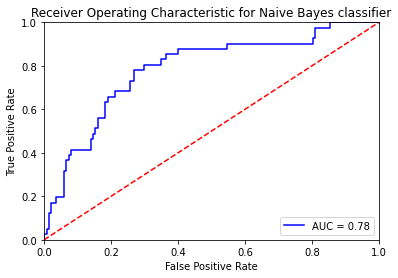

In [22]:
# polt AUC
plt.title('Receiver Operating Characteristic for Naive Bayes classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()